## Visualize Population Based Augmentation

Run all cells below to visualize augmentations on a sample image.

0, 1, or 2 augmentations will be applied.

Does not include additional horizontal flip, pad/crop, or Cutout that may be applied beforehand during training.

In [1]:
import PIL
import matplotlib.pyplot as plt
import numpy as np

import pba.augmentation_transforms_hp as augmentation_transforms_hp
from pba.utils import parse_log_schedule
from pba.data_utils import parse_policy

In [2]:
# Initialize CIFAR & SVHN policies.
cifar_policy = (parse_log_schedule('schedules/rcifar10_16_wrn.txt', 200), 'cifar10_4000')
svhn_policy = (parse_log_schedule('schedules/rsvhn_16_wrn.txt', 160), 'svhn_1000')

def parse_policy_hyperparams(policy_hyperparams):
    """We have two sets of hparams for each operation, which we need to split up."""
    split = len(policy_hyperparams) // 2
    policy = parse_policy(
        policy_hyperparams[:split], augmentation_transforms_hp)
    policy.extend(parse_policy(
        policy_hyperparams[split:], augmentation_transforms_hp))
    return policy

INFO:tensorflow:final len 200
INFO:tensorflow:final len 160


### User input possible in cell below

Defaults to CIFAR policy and image of bird from CIFAR-10, at the final epoch of the schedule.

You can change the image path (`image_path`), augmentation schedule (`cifar_policy` or `svhn_policy`), and which epoch to use within the schedule.

In [8]:
image_size = 32
image_path = 'figs/bird5.png'

# Choice of either cifar_policy or svhn_policy
policy, dset = cifar_policy

# Epoch number to use for policy. 200 epochs for CIFAR and 160 for SVHN.
epoch = 200

# Number of images to display
num_images = 10

Showing 10 example images at epoch 200.

Applied augmentations:
('TranslateY', 0.6, 7)
('Contrast', 1.0, 7)


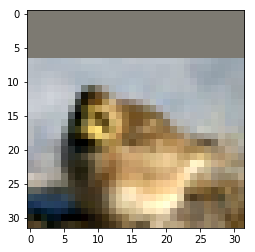

Applied augmentations:
('Contrast', 1.0, 7)
('TranslateY', 1.0, 0)


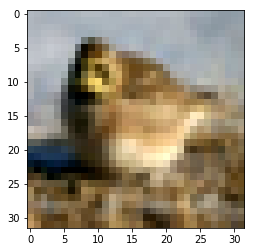

Applied augmentations:
('TranslateX', 0.8, 6)
('TranslateX', 0.6, 6)


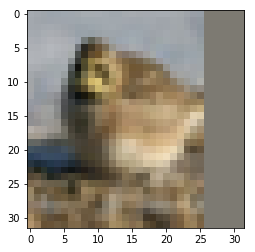

Applied augmentations:
('Solarize', 1.0, 5)


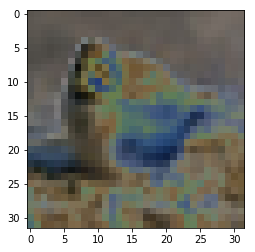

Applied augmentations:
('Equalize', 1.0, 6)


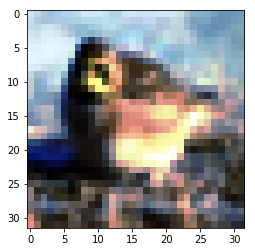

Applied augmentations:
('Color', 0.9, 4)
('Cutout', 0.5, 2)


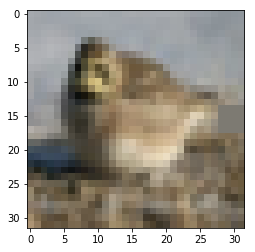

Applied augmentations:
('AutoContrast', 1.0, 9)


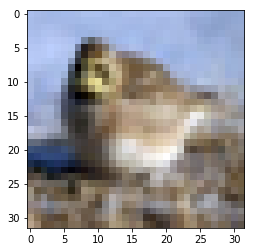

Applied augmentations:
('AutoContrast', 1.0, 9)


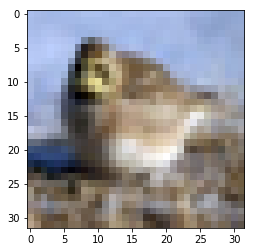

Applied augmentations:
('AutoContrast', 1.0, 9)
('Contrast', 1.0, 7)


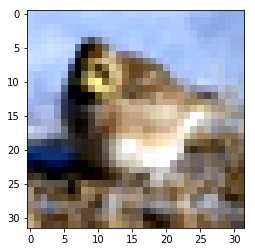

Applied augmentations:


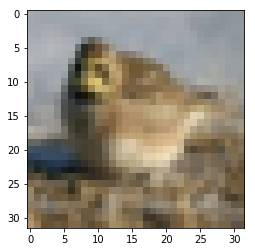

In [16]:
# Load image
img = np.array(PIL.Image.open(image_path))

# Normalize Image
img = img / 255.
img = (img - augmentation_transforms_hp.MEANS[dset]) / augmentation_transforms_hp.STDS[dset]

print('Showing 10 example images at epoch {}.\n'.format(epoch))

for _ in range(num_images):
    # Apply augmentations
    print('Applied augmentations:')
    img_aug = augmentation_transforms_hp.apply_policy(
        policy=parse_policy_hyperparams(policy[epoch - 1]),
        img=img,
        aug_policy='cifar10',
        dset=dset,
        image_size=image_size,
        verbose=True)
    
    # Unnormalize Image
    img_aug = (img_aug * augmentation_transforms_hp.STDS[dset]) + augmentation_transforms_hp.MEANS[dset]
    
    plt.imshow(img_aug)
    plt.show()